# Exercise 2 Implementation of a Random Forest Algorithm

In [193]:
%pip install -r requirements.txt -q


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Note: you may need to restart the kernel to use updated packages.


In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Algorithm for Random Forest Work:

Step 1: Select random K data points from the training set. (Geek)

Step 1: Create Multiple Data Sets. (Lecture)

Step 2: Build the decision trees associated with the selected data points(Subsets). (Geek)

Step 3: Choose the number N for decision trees that you want to build. (Geek)

Step 4: Repeat Step 1 and 2. (Geek)

Step 2: Build Multiple Classifiers. (Lecture)

Step 3: Combine Classifiers. (Lecture)

Step 5: For new data points, find the predictions of each decision tree, and assign the new data points to the category that wins the majority votes. (Geek)

### sample data set to test code

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.000000,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.000000,7.139524,3.45870,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.000000,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.000000,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.474,12.4,209.999993,3.360347,1.77788,1.801000,3.0,NaN,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.321,4.4,300.000012,6.363094,4.70625,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.131,6.3,439640.014648,9.109355,5.91771,28.469999,NaN,NaN,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886,NaN,6800.000191,5.312203,4.46518,12.520000,2.5,NaN,510982.75,4837094.00,2649687.82


<AxesSubplot:>

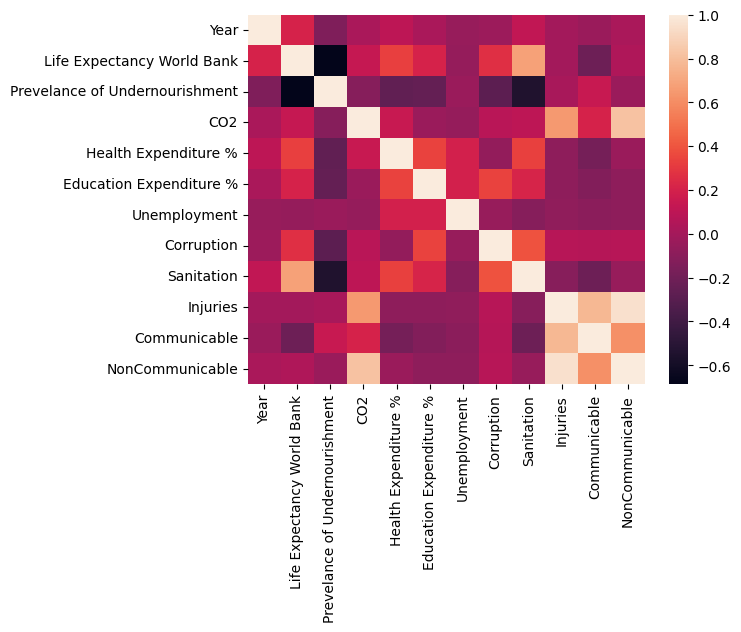

In [195]:
df_life_exp = pd.read_csv('data/life_expectancy.csv')

display(df_life_exp)
df_life_exp_cleaned = df_life_exp.dropna(subset=['Life Expectancy World Bank'])

corrmat_life_exp = df_life_exp_cleaned.corr(method='pearson', numeric_only=True)
sns.heatmap(corrmat_life_exp)

array([[<AxesSubplot:title={'center':'Health Expenditure %'}>]],
      dtype=object)

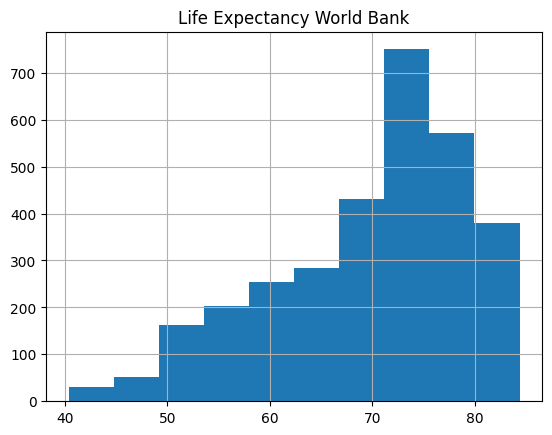

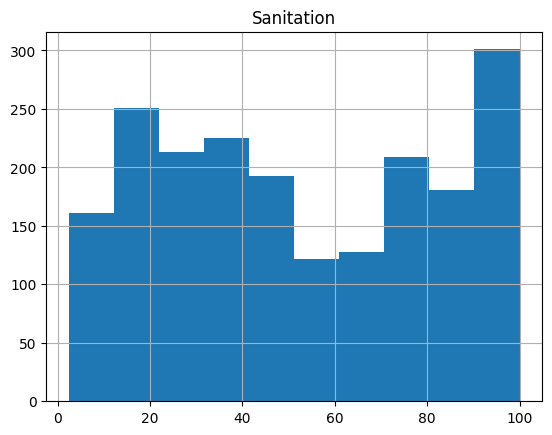

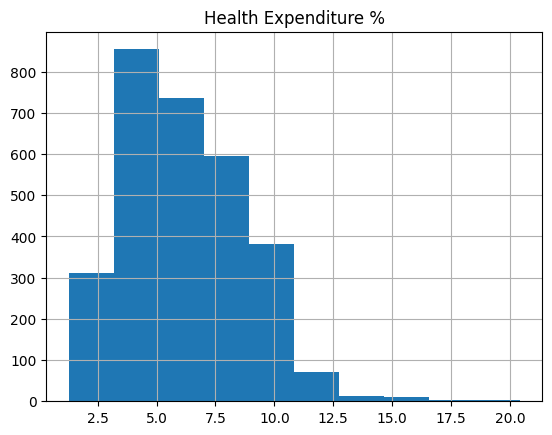

In [196]:
df_life_exp_cleaned.hist(column=['Life Expectancy World Bank'])
df_life_exp_cleaned.hist(column=['Sanitation'])
df_life_exp_cleaned.hist(column=['Health Expenditure %'])

Text(0, 0.5, 'Health Expenditure %')

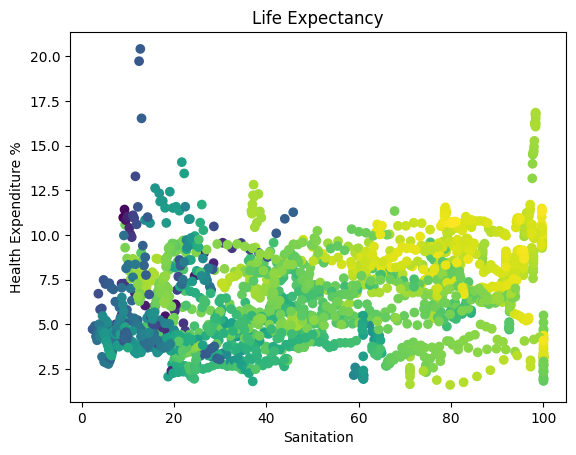

In [197]:
plt.figure()
plt.scatter(df_life_exp_cleaned['Sanitation'], df_life_exp_cleaned['Health Expenditure %'], c = df_life_exp_cleaned['Life Expectancy World Bank'])
plt.title('Life Expectancy')
plt.xlabel('Sanitation')
plt.ylabel('Health Expenditure %')

## Step 1 Create Multiple Data Sets.

In [202]:
# Bootstrapping

class create_data_sets():
    def __init__(self, min_samples=1):
        self.min_samples = min_samples
        
    def bootstrapping(self, X, y):
        
        num_samples = X.shape[0]
        if num_samples >= self.min_samples:
            index = np.random.choice(num_samples, num_samples, replace=True)
            return X[index], y[index]

## Step 2 Build Multiple Classifiers.

### Decision Tree Regression

In [ ]:
# Decision Tree for Regression

class Nodes():
    def __init__(self, feature=None, threshold=None, true=None, false=None, variance_reduction=None, value=None):
        self.feature = feature # Feature for the splitting 
        self.threshold = threshold # Condition for the splitting
        self.true = true
        self.fasle = false
        self.variance_reduction = variance_reduction
        self.value = None
        
    def leaf_node(self):
        return self.value is not None
        
class Decision_Tree():
    def __init__(self, min_samples_split=2, max_depth=2, root=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = root
        
    # Function  to build the tree
    def build_desicion_tree(self, df, target_column, current_depth=0):
        X, y = df.drop[:, target_column], df[:, target_column]
        num_samples, num_features = np.shape(X)
        best_split = {}
        if num_samples >= self.min_samples_split and current_depth <= self.max_depth:
            best_split = self.get_best_split(df, num_samples, num_features)
            if best_split['variance_reduction'] > 0:
                true_sub_tree = self.build_decision_tree(best_split['df_true'], current_depth+1)
                false_sub_tree = self.build_decision_tree(best_split['df_false'], current_depth+1)
                
                return Nodes(best_split['index'], best_split['threshold'], true_sub_tree, false_sub_tree, best_split['variance_reduction'])
        leaf_value = self.get_leaf_value(y)
        return Nodes(value = leaf_value)
    
    def get_leaf_value(self, y):
        n = len(y)
        value = 1/n*sum(y)
        return value
            
    # Function for Variance
    def variance(self, target_column):
        n = len(target_column)
        target_column = np.array(target_column)
        var = 1/n*(np.sum((target_column - 1/n*(sum(target_column))) ** 2))
        return var

    # Function for Variance Reduction
    def variance_reduction(self, target_column_parent, target_column_t_child, target_column_f_child):
        w_t = len(target_column_t_child)/len(target_column_parent)
        w_f = len(target_column_f_child)/len(target_column_parent)
        var_red = self.variance(target_column_parent) - w_t*self.variance(target_column_t_child) - w_f*self.variance(target_column_f_child)
        return var_red
        
    def split(self, df, index, threshold):
        df_true = df[df['index']<=threshold]
        df_false = df[df['index']>threshold]
        return df_true, df_false

## Combine steps before to the Random Forest Algorithm

In [ ]:
class Random_Forest():
    def __init__(self, num_trees = 15, max_depth = 15, min_samples_split = 2, num_features = None):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.num_features = num_features
        self.trees = []